<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**План:**

1. Загрузим и проведем предобработку данных.

2. В качестве кодирования используем умножение матириц.

3. Обучим LinearRegression отдельно на начальных и на закодированных данных.Сравним качество по f2.


## Загрузка данных

In [30]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [31]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('insurance.csv')

In [32]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [33]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [34]:
df.duplicated().sum()

153

In [35]:
df[df.duplicated()].head(20)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
869,1,24.0,33100.0,1,0
887,1,19.0,35500.0,0,0
1004,1,29.0,42400.0,0,0
1089,0,27.0,46800.0,2,0
1091,1,41.0,34000.0,1,0


Дубликатов не много,визуально,ничего необычного,скорее всего это просто совпадения

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [37]:
df.loc[df['Возраст'] % 1 > 0]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты


In [38]:
df.loc[df['Возраст'] > 128]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты


In [39]:
df.loc[df['Зарплата'] % 1 > 0]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
80,1,41.0,32700.0,0,0
159,1,19.0,64900.0,2,0
313,0,25.0,32700.0,1,0
392,1,43.0,32700.0,1,1
448,1,32.0,32700.0,2,0
772,1,20.0,65100.0,1,0
820,0,29.0,32200.0,2,0
872,0,23.0,32200.0,3,0
911,0,30.0,32200.0,0,0
963,1,20.0,64100.0,0,0


С данными не заметно никаких проблем

In [40]:
df['Возраст'] = np.int8(df['Возраст'])
df['Зарплата'] = np.int32(df['Зарплата'])
df['Пол'] = np.int8(df['Пол'])
df['Члены семьи'] = np.int8(df['Члены семьи'])
df['Страховые выплаты'] = np.int8(df['Страховые выплаты'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int8 
 1   Возраст            5000 non-null   int8 
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int8 
 4   Страховые выплаты  5000 non-null   int8 
dtypes: int32(1), int8(4)
memory usage: 39.2 KB


                        Пол   Возраст  Зарплата  Члены семьи  \
Пол                1.000000  0.002074  0.014910    -0.008991   
Возраст            0.002074  1.000000 -0.019093    -0.006692   
Зарплата           0.014910 -0.019093  1.000000    -0.030296   
Члены семьи       -0.008991 -0.006692 -0.030296     1.000000   
Страховые выплаты  0.010140  0.651030 -0.014963    -0.036290   

                   Страховые выплаты  
Пол                         0.010140  
Возраст                     0.651030  
Зарплата                   -0.014963  
Члены семьи                -0.036290  
Страховые выплаты           1.000000  


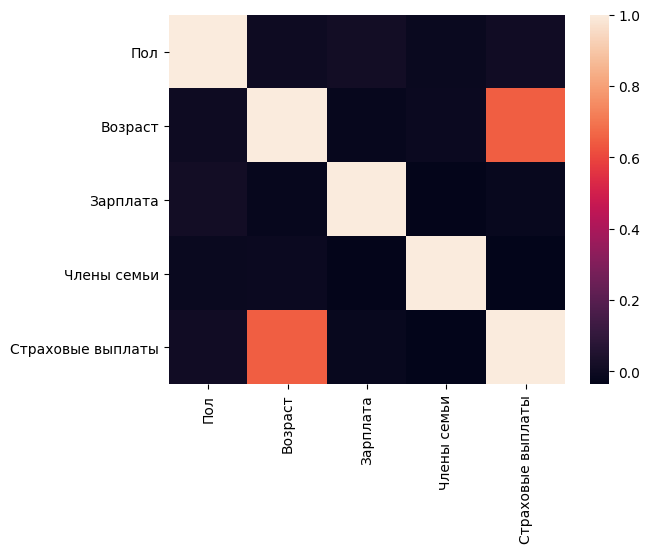

In [53]:
col = ['Пол','Возраст','Зарплата','Члены семьи','Страховые выплаты']
corr_matrix = df.loc[:,col].corr() 
print(corr_matrix)
sn.heatmap(corr_matrix);

Наблюдается связь возраста и целевым признаком,но связь можно считать слабой.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не поменяется

**Обоснование:** 

$$
w_2 = ((XP)^T XP)^{-1} (XP)^T y 
$$

$$
w_2 = (P^T(X^TX) P)^{-1} (XP)^T y 
$$

$$
w_2 = (P)^{-1}(X^TX)^{-1}(P^T)^{-1}P^T X^Ty
$$

$$
w_2 = (P)^{-1}(X^TX)^{-1}X^Ty
$$

$$w_2 = (P)^{-1}w$$

$$ a = XPP^{-1}w$$ 

$$
a = Xw
$$

## Алгоритм преобразования

**Алгоритм**

Помножим на случайную обратимую матрицу

**Обоснование**

При данном способе данные должны получится маштабированы в случайных маштабах

## Проверка алгоритма

In [46]:
def rand_matrix(a):
    try:
        r = np.random.RandomState(a)
        random_matrix = r.normal(size=(4,4))
        inv = np.linalg.inv(random_matrix) 
        return random_matrix
    except np.linalg.LinAlgError:
        return rand_matrix(a)

In [47]:
random_matrix = rand_matrix(42) 

In [48]:
random_matrix

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753]])

In [49]:
features = df.drop('Страховые выплаты',axis=1)
target = df['Страховые выплаты']
features_matrix = features.dot(random_matrix)

In [50]:
def linear_regression(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11111,test_size = .2)
    model = LinearRegression()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test,pred)
    return r2

In [51]:
linear_regression(features,target)

0.4076842272667832

In [52]:
linear_regression(features_matrix,target)

0.4076842272665755

## Вывод

Разницы в метрике r2 практически нет,умножение данных на матрицу не повлияло на качество обучения.

Данные защитили,при преобразовании качество моделей машинного обучения не ухудшилось.